**libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression

**READ DATA**

In [ ]:
df=pd.read_csv('/content/diabetes_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [ ]:
df
#hypertension : ضغط دم
#heart_disease : امراض القلب
#smoking_history : التدخين
#bmi : مؤشر كتلة الجسم
#hbA1c_level : مستوي الهيموجلوبين
#blood_glucose_level : مستوي السكر في الدم
#diabetes : التنبؤ بمرض السكري

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,Female,33.0,Wyoming,0,0,0,0,1,0,0,never,21.21,6.5,90,0
99996,2016,Female,80.0,Wyoming,0,1,0,0,0,0,0,No Info,36.66,5.7,100,0
99997,2018,Male,46.0,Wyoming,0,1,0,0,0,0,0,ever,36.12,6.2,158,0
99998,2018,Female,51.0,Wyoming,1,0,0,0,0,0,0,not current,29.29,6.0,155,0


In [ ]:
df['diabetes'].unique()

array([0, 1])

In [ ]:
df.shape

(100000, 16)

In [ ]:
label_encoder={}
# select of col its datatype is Object
categorical_cols=df.select_dtypes(include=("object")).columns
for col in categorical_cols:
  df[col]=df[col].astype(str)
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])
  label_encoder[col]=le

In [ ]:
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,0,32.0,0,0,0,0,0,1,0,0,4,27.32,5.0,100,0
1,2015,0,29.0,0,0,1,0,0,0,0,0,4,19.95,5.0,90,0
2,2015,1,18.0,0,0,0,0,0,1,0,0,4,23.76,4.8,160,0
3,2015,1,41.0,0,0,0,1,0,0,0,0,4,27.32,4.0,159,0
4,2016,0,52.0,0,1,0,0,0,0,0,0,4,23.75,6.5,90,0


In [ ]:
df.describe()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,0.414660,41.885856,24.748430,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,2.179650,27.320767,5.527507,138.058060,0.085000
std,1.345239,0.493031,22.516840,14.786326,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,1.889659,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,0.000000,24.000000,12.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,0.000000,43.000000,25.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,3.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,1.000000,60.000000,37.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,4.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,2.000000,80.000000,54.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


**CHECK OUTLIERS**

In [ ]:
def detect_outliers_iqr(df):
  #empty place to save col that has outliers
    outlier_indices = {}
    for col in df.select_dtypes(include=['int64','float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)][col]
        if not outliers.empty:
            outlier_indices[col] = outliers
    return outlier_indices
outliers = detect_outliers_iqr(df)
for col, vals in outliers.items():
    print(f"🔹 {col} has {len(vals)} outliers")

🔹 year has 20255 outliers
🔹 race:AfricanAmerican has 20223 outliers
🔹 race:Asian has 20015 outliers
🔹 race:Caucasian has 19876 outliers
🔹 race:Hispanic has 19888 outliers
🔹 race:Other has 19998 outliers
🔹 hypertension has 7485 outliers
🔹 heart_disease has 3942 outliers
🔹 bmi has 7086 outliers
🔹 hbA1c_level has 1315 outliers
🔹 blood_glucose_level has 2038 outliers
🔹 diabetes has 8500 outliers


***CORRELATION***

In [ ]:
corr=df.corr()
corr

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
year,1.000000,0.001104,-0.003304,-0.062219,-0.004291,-0.007224,0.010587,0.004153,-0.003172,-0.003806,0.001820,-0.006519,-0.001861,-0.000465,0.002968,-0.003464
gender,0.001104,1.000000,-0.030656,-0.001573,0.001633,0.000080,-0.004055,0.002197,0.000133,0.014203,0.077696,-0.077919,-0.022994,0.019957,0.017199,0.037411
age,-0.003304,-0.030656,1.000000,0.005388,-0.002183,0.003787,0.003790,0.001962,-0.007336,0.251171,0.233354,0.228608,0.337396,0.101354,0.110672,0.258008
location,-0.062219,-0.001573,0.005388,1.000000,-0.002995,0.000937,-0.002004,0.004955,-0.000874,0.005723,0.004388,0.003602,-0.000210,0.003106,0.002670,-0.000130
race:AfricanAmerican,-0.004291,0.001633,-0.002183,-0.002995,1.000000,-0.251859,-0.250765,-0.250860,-0.251725,-0.001201,-0.000664,0.006178,-0.001249,0.001312,0.002292,0.004378
race:Asian,-0.007224,0.000080,0.003787,0.000937,-0.251859,1.000000,-0.249148,-0.249241,-0.250102,0.003977,0.006166,-0.002324,0.005240,-0.000473,0.000171,0.003739
race:Caucasian,0.010587,-0.004055,0.003790,-0.002004,-0.250765,-0.249148,1.000000,-0.248159,-0.249015,0.000503,-0.001225,0.003558,-0.002114,-0.004033,0.004121,-0.001749
race:Hispanic,0.004153,0.002197,0.001962,0.004955,-0.250860,-0.249241,-0.248159,1.000000,-0.249109,0.001369,-0.000771,-0.005553,0.002363,0.000446,-0.002684,-0.001301
race:Other,-0.003172,0.000133,-0.007336,-0.000874,-0.251725,-0.250102,-0.249015,-0.249109,1.000000,-0.004641,-0.003510,-0.001887,-0.004236,0.002735,-0.003905,-0.005095
hypertension,-0.003806,0.014203,0.251171,0.005723,-0.001201,0.003977,0.000503,0.001369,-0.004641,1.000000,0.121262,0.093177,0.147666,0.080939,0.084429,0.197823


<Axes: >

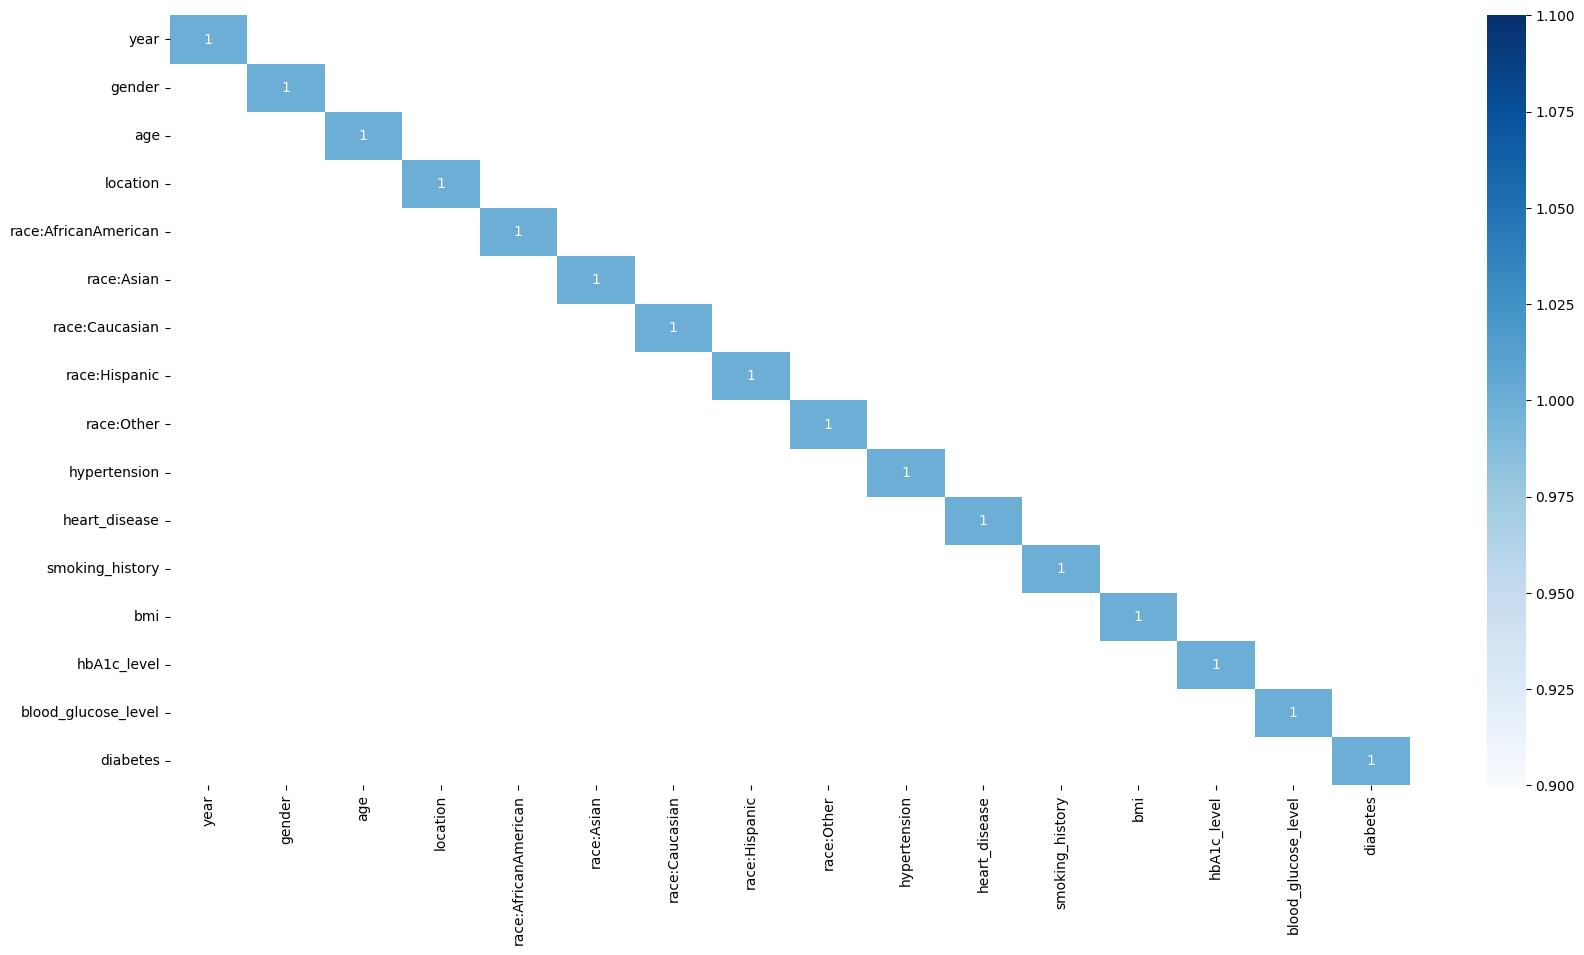

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='Blues',mask=corr<.95)

In [ ]:
x=df.drop('diabetes',axis=1)
y=df['diabetes']

In [ ]:
y.value_counts() #unbalanced data

,count
diabetes,
0,91500
1,8500


**OVERSAMPLING**

In [ ]:
smote=SMOTE()
x,y=smote.fit_resample(x,y)
#adv of smote : reduce overfitting
#disadv : potential of noise made by outliers
#why we didn't use undersampling?
#fair of lossing data

In [ ]:
y.value_counts()

,count
diabetes,
0,91500
1,91500


**TRAIN-TEST-SPLIT**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(128100, 15)
(54900, 15)
(128100,)
(54900,)


In [ ]:
!pip install catboost

**BOOSTING**

In [ ]:
from catboost import CatBoostClassifier
params={
    'n_estimators':[50,100,200,250],
    'max_depth':[None,20,30,40,50,60],
}

In [ ]:
grid=GridSearchCV(estimator=CatBoostClassifier(),param_grid=params,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)

Learning rate set to 0.5
0:	learn: 0.4088120	total: 87.3ms	remaining: 4.28s
1:	learn: 0.2987865	total: 129ms	remaining: 3.09s
2:	learn: 0.2333229	total: 184ms	remaining: 2.89s
3:	learn: 0.1982812	total: 232ms	remaining: 2.67s
4:	learn: 0.1629319	total: 270ms	remaining: 2.43s
5:	learn: 0.1408845	total: 284ms	remaining: 2.08s
6:	learn: 0.1158620	total: 300ms	remaining: 1.84s
7:	learn: 0.1045216	total: 316ms	remaining: 1.66s
8:	learn: 0.0975823	total: 331ms	remaining: 1.5s
9:	learn: 0.0917816	total: 345ms	remaining: 1.38s
10:	learn: 0.0889385	total: 358ms	remaining: 1.27s
11:	learn: 0.0862880	total: 372ms	remaining: 1.18s
12:	learn: 0.0802210	total: 390ms	remaining: 1.11s
13:	learn: 0.0766096	total: 409ms	remaining: 1.05s
14:	learn: 0.0737081	total: 423ms	remaining: 987ms
15:	learn: 0.0704506	total: 440ms	remaining: 935ms
16:	learn: 0.0691283	total: 454ms	remaining: 881ms
17:	learn: 0.0681948	total: 468ms	remaining: 832ms
18:	learn: 0.0663072	total: 483ms	remaining: 787ms
19:	learn: 0.065

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/catboost/core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/usr/local/lib/python3.12/dist-packages/catboost/core.py", line 2395, in 

Learning rate set to 0.357942
0:	learn: 0.2561998	total: 29ms	remaining: 5.77s
1:	learn: 0.1945621	total: 61ms	remaining: 6.04s
2:	learn: 0.1183661	total: 88.5ms	remaining: 5.81s
3:	learn: 0.1065215	total: 117ms	remaining: 5.73s
4:	learn: 0.0921159	total: 146ms	remaining: 5.7s
5:	learn: 0.0847140	total: 174ms	remaining: 5.64s
6:	learn: 0.0810222	total: 207ms	remaining: 5.71s
7:	learn: 0.0784253	total: 236ms	remaining: 5.67s
8:	learn: 0.0730472	total: 265ms	remaining: 5.63s
9:	learn: 0.0678774	total: 299ms	remaining: 5.68s
10:	learn: 0.0640638	total: 347ms	remaining: 5.96s
11:	learn: 0.0618424	total: 380ms	remaining: 5.96s
12:	learn: 0.0601531	total: 421ms	remaining: 6.05s
13:	learn: 0.0595715	total: 448ms	remaining: 5.96s
14:	learn: 0.0578664	total: 478ms	remaining: 5.89s
15:	learn: 0.0566989	total: 507ms	remaining: 5.83s
16:	learn: 0.0562957	total: 534ms	remaining: 5.75s
17:	learn: 0.0556899	total: 565ms	remaining: 5.71s
18:	learn: 0.0550776	total: 592ms	remaining: 5.64s
19:	learn: 0.

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7812e0df5310>,
             param_grid={'max_depth': [None, 20, 30, 40, 50, 60],
                         'n_estimators': [50, 100, 200, 250]},
             scoring='accuracy')

In [ ]:
grid.best_estimator_

In [ ]:
grid.best_params_

{'max_depth': None, 'n_estimators': 200}

In [ ]:
y_train_pred=grid.predict(x_train)
y_test_pred=grid.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_test_pred)*100)
print(classification_report(y_test,y_test_pred))

98.19854280510019
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27325
           1       0.99      0.97      0.98     27575

    accuracy                           0.98     54900
   macro avg       0.98      0.98      0.98     54900
weighted avg       0.98      0.98      0.98     54900



In [ ]:
print(accuracy_score(y_train,y_train_pred)*100)
print(classification_report(y_train,y_train_pred))

98.88836846213896
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     64175
           1       1.00      0.98      0.99     63925

    accuracy                           0.99    128100
   macro avg       0.99      0.99      0.99    128100
weighted avg       0.99      0.99      0.99    128100



***BAGGING***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, StackingClassifier
base_classifer = DecisionTreeClassifier(max_features=10)

In [ ]:
bagging = BaggingClassifier(base_classifer, n_estimators=10, random_state=42)
bagging.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_features=10),
                  random_state=42)

In [ ]:
y_pred_train = bagging.predict(x_train)
y_pred_test = bagging.predict(x_test)

In [ ]:
print("train acc:" , accuracy_score(y_train,y_pred_train))
print("test acc:" , accuracy_score(y_test,y_pred_test))

train acc: 0.9980796252927401
test acc: 0.9776502732240437


***DECISION TREE***

In [ ]:
param_grid = {'max_depth': list(range(1, 11))}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [ ]:
print(" Best max_depth:", grid.best_params_)

 Best max_depth: {'max_depth': 10}


In [ ]:
best_model = grid.best_estimator_

In [ ]:
importances = best_model.feature_importances_

In [ ]:
for name, score in zip(x.columns, importances):
    print(f"{name}: {score:.3f}")

year: 0.000
gender: 0.000
age: 0.092
location: 0.000
race:AfricanAmerican: 0.006
race:Asian: 0.010
race:Caucasian: 0.012
race:Hispanic: 0.008
race:Other: 0.008
hypertension: 0.000
heart_disease: 0.000
smoking_history: 0.001
bmi: 0.026
hbA1c_level: 0.538
blood_glucose_level: 0.298


In [ ]:
y_pred = best_model.predict(x_test)
y_train_pred = best_model.predict(x_train)

In [ ]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))

Test Accuracy: 0.9345355191256831
Train Accuracy: 0.9385167837626854


***SVM***

In [ ]:
from sklearn.svm import SVC , SVR
svm = SVC(C= 10, class_weight='balanced',kernel="rbf")
svm.fit(x_train, y_train)

SVC(C=10, class_weight='balanced')

In [ ]:
y_pred = svm.predict(x_test)
y_train_pred = svm.predict(x_train)

In [ ]:
print("acc train", accuracy_score(y_train, y_train_pred))
print("acc test", accuracy_score(y_test, y_pred))

acc train 0.9598360655737705
acc test 0.9553369763205829


***LogisticRegression***

In [ ]:
model = LogisticRegression()
model.fit(x_train , y_train)

LogisticRegression()

In [ ]:
y_pred2 = model.predict(x_test)
y_train_pred2=model.predict(x_train)

In [ ]:
accuracy_score(y_test , y_pred)

0.9553369763205829

In [ ]:
accuracy_score(y_train,y_train_pred)

0.9598360655737705

***NAIVE***

In [ ]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(x_train , y_train)

GaussianNB()

In [ ]:
y_pred6 = model1.predict(x_test)
y_train_pred6=model1.predict(x_train)
accuracy_score(y_test , y_pred6)

0.9187067395264117

In [ ]:
accuracy_score(y_train,y_train_pred6)

0.9196252927400468